In [126]:
import pickle
import tweepy
import re #https://developers.google.com/edu/python/regular-expressions
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import nltk
from nltk.collocations import *
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
#nltk.download('pos_tag')


import math

from PIL import Image


import community

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/LauJohansson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/LauJohansson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LauJohansson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/LauJohansson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
#nx.write_gpickle(G, "second_network_w_weights_listversion_wrealnames_v2.gpickle")
G = nx.read_gpickle("second_network_w_weights_listversion_wrealnames_v2.gpickle")

In [10]:
G_undirected=G.to_undirected()

In [11]:
Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
giant_directed=G.subgraph(Gcc[0])
giant = G_undirected.subgraph(Gcc[0])
d = dict(giant.degree) #Saves the degree for making the nodesize depended of the degreee in plots

In [75]:
#Generate video
#https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python

def plot_d_step_away(node_name,graph,d,color_for_nodes,plotting="yes"):
    #Saves the shortest path
    values=np.array(list(nx.single_source_shortest_path_length(giant,node_name).values()))
    nodess=np.array(list(nx.single_source_shortest_path_length(giant,node_name).keys())) 
    
    #Making a bool-list which detects if the path (or steps) are equal to d:
    steps2= [True if element==d else False for element in values]
    
    #The bool-list can then select the nodes which are d steps away:
    
    nodes2=nodess[steps2]
    
    dic=nx.single_source_shortest_path_length(giant,node_name)
    
    
    
    color_map = []
    alpha_list=[]
    for node in giant:
        if node == node_name:
            color_map.append('green')
            alpha_list.append(1)
        elif node in nodes2:
            color_map.append(color_for_nodes)
            #alpha_list.append(dic[node]*0.5)
            alpha_list.append(1)
        else: 
            color_map.append('grey')  
            alpha_list.append(dic[node]*0.2)
            
    if plotting=="yes":
        plt.figure(figsize=(10,20))
        nx.draw_kamada_kawai(giant,node_size=50, node_color=color_map)
        plt.title("GCC (Green random node with "+color_for_nodes +"coloured nodes "+str(d)+" steps away",fontsize=18)
        plt.show()
    
    return color_map,alpha_list

    
    

In [51]:
import random
#rc=random.choice(list(giant.nodes()))
rc="StemClausson"

In [52]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs   #Want hubs inside other!
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)


positions = forceatlas2.forceatlas2_networkx_layout(giant, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:20<00:00, 97.13it/s] 

BarnesHut Approximation  took  3.80  seconds
Repulsion forces  took  14.74  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  0.48  seconds
AdjustSpeedAndApplyForces step  took  0.45  seconds


In [96]:
c_map,alpha_list=plot_d_step_away(rc,giant,1,"red",plotting="no")

In [97]:
c_map2,alpha_list2=plot_d_step_away(rc,giant,2,"blue",plotting="no")

In [98]:
c_map3,alpha_list3=plot_d_step_away(rc,giant,3,"purple",plotting="no")

In [99]:
c_map4,alpha_list4=plot_d_step_away(rc,giant,4,"orange",plotting="no")

In [100]:
c_map5,alpha_list5=plot_d_step_away(rc,giant,5,"magenta",plotting="no")

In [101]:
c_map6,alpha_list6=plot_d_step_away(rc,giant,6,"cyan",plotting="no")

In [102]:
c_map_all=[c_map,c_map2,c_map3,c_map4,c_map5,c_map6]
alpha_list_all=[alpha_list,alpha_list2,alpha_list3,alpha_list4,alpha_list5,alpha_list6]

In [103]:
import imageio

In [104]:
images = []

In [119]:
n_sizes = [50 if node!='StemClausson' else 450 for node in list(giant.nodes())   ]

In [121]:
from matplotlib.lines import Line2D

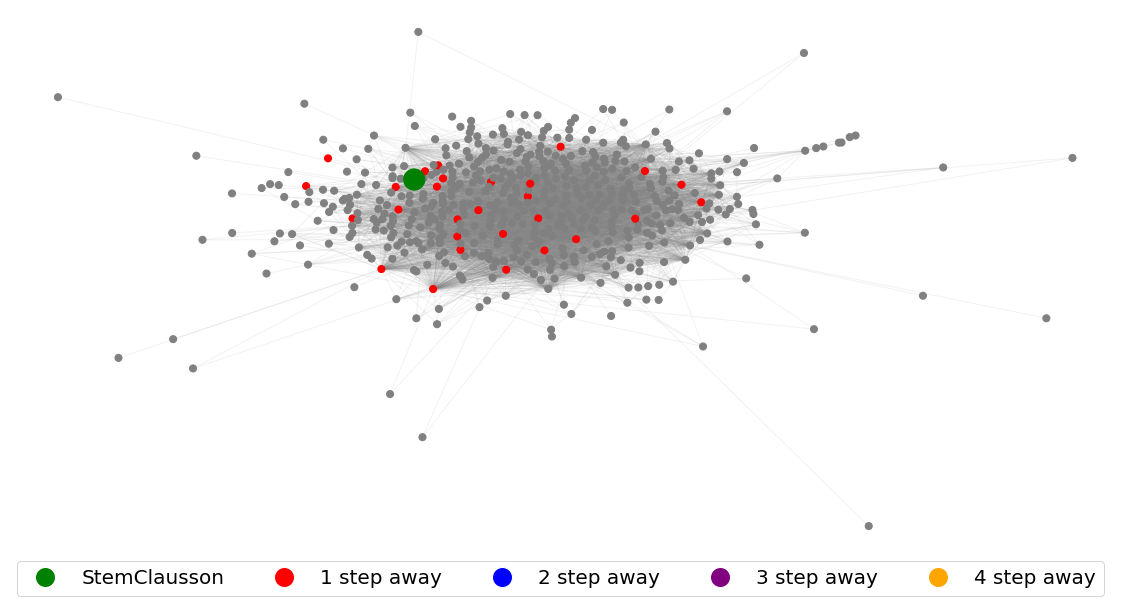

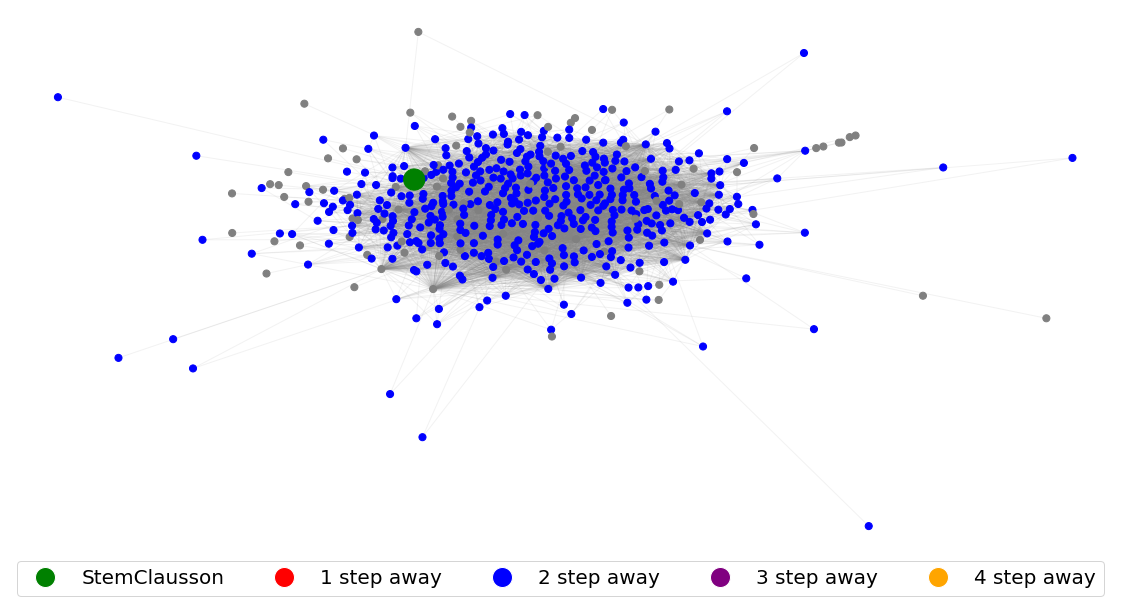

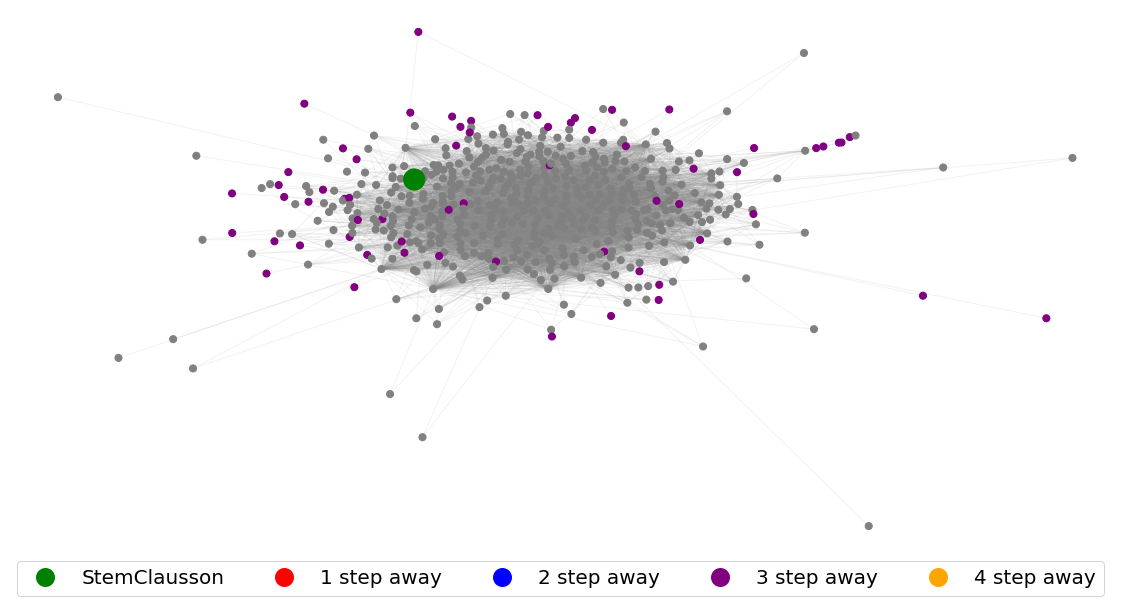

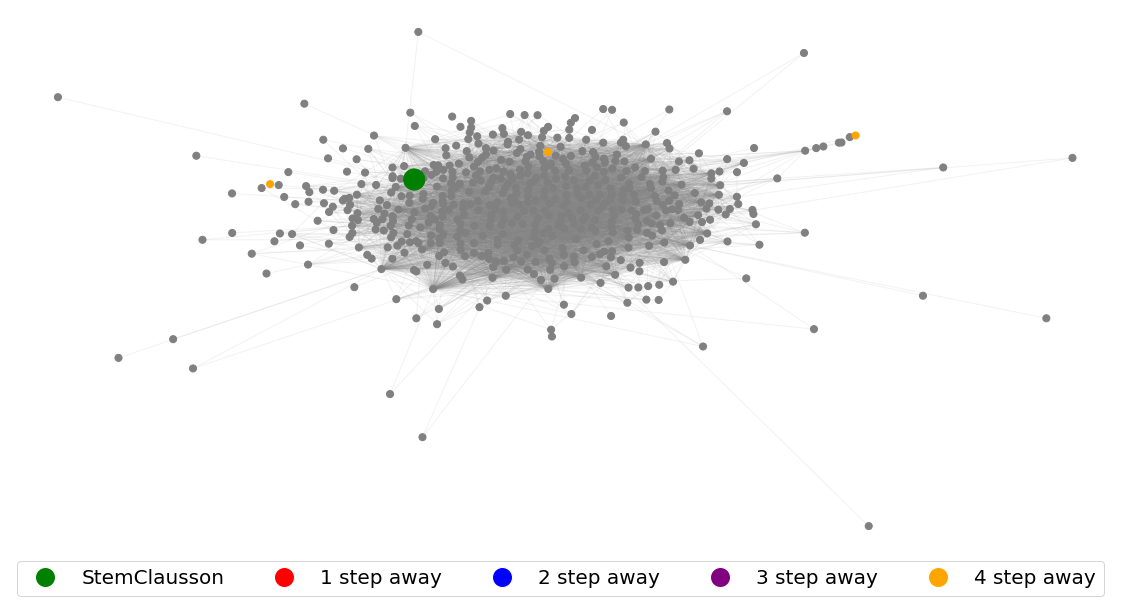

In [124]:

for i in range(4):
    plt.figure(figsize=(20,10))
    #nx.draw_networkx_nodes(giant, positions, alpha=alpha_list,node_size=[v * 1 for v in d.values()],node_color=c_map_all)

    #nx.draw_networkx_nodes(giant, positions, alpha=alpha_list[i],node_color=c_map_all[i],node_size=50)
    nx.draw_networkx_nodes(giant, positions,node_color=c_map_all[i],node_size=n_sizes)
    nx.draw_networkx_edges(giant, positions, edge_color="grey", alpha=0.1)
    #patch1 = mpatches.Patch(color='r', label='1 step away')
    #patch2 = mpatches.Patch(color='b', label='2 step away')
    #patch3 = mpatches.Patch(color='purple', label='3 step away')
    #patch4 = mpatches.Patch(color='orange', label='4 step away')
    patch5 = mpatches.Patch(color='magenta', label='5 step away')
    
    patch1 = Line2D([0], [0], marker='o', color='w', label='1 step away',
                        markerfacecolor='r',markersize=20)
    patch2 = Line2D([0], [0], marker='o', color='w', label='2 step away',
                        markerfacecolor='b',markersize=20)
    patch3 = Line2D([0], [0], marker='o', color='w', label='3 step away',
                        markerfacecolor='purple',markersize=20)
    patch4 = Line2D([0], [0], marker='o', color='w', label='4 step away',
                        markerfacecolor='orange',markersize=20)
    patch5 = Line2D([0], [0], marker='o', color='w', label='StemClausson',
                        markerfacecolor='green',markersize=20)

    plt.legend(handles=[patch5,patch1,patch2,patch3,patch4],loc=2,prop={'size': 20},bbox_to_anchor=(0, 0),ncol=5)
    plt.axis('off')
    plt.savefig('gif_house_of_cards/gif_pic_'+str(i)+'.png')
    plt.show()
    
    

In [ ]:
#https://ezgif.com/maker

In [129]:
giant.degree("larsloekke")

213